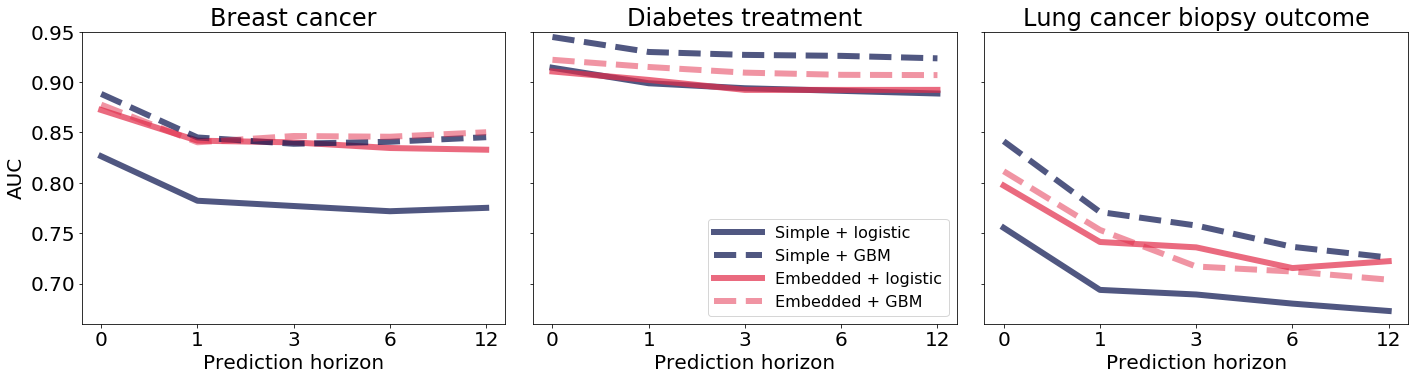

In [11]:
import dill
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML

def get_model_info(m_string):
    parts = m_string.split(".")[0].split("_")
    algo = parts[2]
    softmax = parts[3]
    window_size = parts[4].split("-")[1]
    emb_size = parts[5].split("-")[1]
    return "{}, {}, window: {}, embedding: {}".format(algo.upper(), softmax.upper(), window_size, emb_size)


def reorder_labels(handles, labels):
    new_handles = [handles[0], handles[2], handles[1], handles[3]]
    new_labels = [labels[0], labels[2], labels[1], labels[3]]
    return new_handles, new_labels


# red_1 = '#ca0020'
red_1 ='#e22b49'
red_2 = '#f4a582'
# blue_1 = '#0571b0'
blue_1 = '#06104c'
blue_2 = '#92c5de'


alpha_1 = 0.7
alpha_2 = 0.5
x_months = [0,1,2,3,4]
x_months_ticks = ["0", "1", "3", "6", "12"]

matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['figure.figsize'] = (20.0, 5.5)

f, ((ax1), (ax2), (ax3)) = plt.subplots(1, 3, sharex='col', sharey='row')
plt.setp(((ax1), (ax2), (ax3)), xticks=x_months, xticklabels=x_months_ticks, xlim=[-0.2, 4.2])

# Breast cancer
counts_elastic_results = pd.read_csv('../breast_cancer/log/breast_cancer_counts_optimized_elasticnet.log', header=None)
counts_elastic_results.columns = ['Months', 'AUC', 'Logloss']
vectors_elastic_results = pd.read_csv('../breast_cancer/log/breast_cancer_vectors_optimized_elasticnet.log', header=None)
vectors_elastic_results.columns = ['Model', 'Months', 'AUC', 'Logloss']

vectors_elastic_results_model_groups = vectors_elastic_results.groupby(by='Model')
vactors_elastic_average_auc = pd.DataFrame.from_records([(model, vals['AUC'].mean()) for model, vals in vectors_elastic_results_model_groups], columns=['Model','AUC mean'])
top_elastic_models_by_mean = vactors_elastic_average_auc.sort_values('AUC mean', ascending=False)[0:4]['Model'].values

ax1.plot(x_months, counts_elastic_results['AUC'], linewidth=6.0, marker=None, ms=16, label='Simple (logistic)', color=blue_1, alpha=alpha_1)
for i, model in enumerate(top_elastic_models_by_mean):
    df = vectors_elastic_results_model_groups.get_group(model)
    ax1.plot(x_months, df['AUC'], linewidth=6.0, marker=None, label='Embedded (logistic)', ms=16, color=red_1, alpha=alpha_1)
    break
ax1.set_ylabel('AUC')
ax1.set_ylim([0.66, 0.95])
ax1.set_xlabel('Prediction horizon')
plt.xticks(x_months,x_months_ticks)


counts_monthly_optim_results = pd.read_csv('../breast_cancer/log/breast_cancer_counts_optimized_xgb.log', header=None)
counts_monthly_optim_results.columns = ['Months', 'AUC', 'Logloss']
vectors_monthly_optim_results = pd.read_csv('../breast_cancer/log/breast_cancer_vectors_monthly_optimized_xgb.log', header=None)
vectors_monthly_optim_results.columns = ['Model', 'Months', 'AUC', 'Logloss']

vectors_monthly_optim_results_model_groups = vectors_monthly_optim_results.groupby(by='Model')
vactors_monthly_optim_average_auc = pd.DataFrame.from_records([(model, vals['AUC'].mean()) for model, vals in vectors_monthly_optim_results_model_groups], columns=['Model','AUC mean'])
top_monthly_optim_models_by_mean = vactors_monthly_optim_average_auc.sort_values('AUC mean', ascending=False)[0:5]['Model'].values

ax1.plot(x_months, counts_monthly_optim_results['AUC'],linestyle="--", linewidth=6.0, marker=None, ms=16, label='Simple (GBM)', color=blue_1, alpha=alpha_1)

for i, model in enumerate(top_monthly_optim_models_by_mean):
    df = vectors_monthly_optim_results_model_groups.get_group(model)
    ax1.plot(x_months, df['AUC'], linewidth=6.0, linestyle="--", marker=None, label='Embedded (GBM)', ms=16, color=red_1, alpha=alpha_2)
    break
    break

ax1.set_ylim([0.66, 0.95])
# ax1.legend(*reorder_labels(*ax1.get_legend_handles_labels()), loc='lower right', prop={'size': 16}, handlelength=3)
ax1.set_title('Breast cancer')


# Metformin
counts_elastic_results = pd.read_csv('../diabetes/log/diabetes_counts_optimized_elasticnet.log', header=None)
counts_elastic_results.columns = ['Months', 'AUC', 'Logloss']
vectors_elastic_results = pd.read_csv('../diabetes/log/diabetes_vectors_optimized_elasticnet.log', header=None)
vectors_elastic_results.columns = ['Model', 'Months', 'AUC', 'Logloss']

vectors_elastic_results_model_groups = vectors_elastic_results.groupby(by='Model')
vactors_elastic_average_auc = pd.DataFrame.from_records([(model, vals['AUC'].mean()) for model, vals in vectors_elastic_results_model_groups], columns=['Model','AUC mean'])
top_elastic_models_by_mean = vactors_elastic_average_auc.sort_values('AUC mean', ascending=False)[0:4]['Model'].values

ax2.plot(x_months, counts_elastic_results['AUC'], linewidth=6.0, marker=None, ms=16, label='Simple + logistic', color=blue_1, alpha=alpha_1)
for i, model in enumerate(top_elastic_models_by_mean):
    df = vectors_elastic_results_model_groups.get_group(model)
    ax2.plot(x_months, df['AUC'],  linewidth=6.0, marker=None, label='Embedded + logistic', ms=16, color=red_1, alpha=alpha_1)
    break
ax2.set_ylim([0.66, 0.95])

counts_monthly_optim_results = pd.read_csv('../diabetes/log/diabetes_counts_monthly_optimized_xgb.log', header=None)
counts_monthly_optim_results.columns = ['Months', 'AUC', 'Logloss']
vectors_monthly_optim_results = pd.read_csv('../diabetes/log/diabetes_vectors_monthly_optimized_xgb.log', header=None)
vectors_monthly_optim_results.columns = ['Model', 'Months', 'AUC', 'Logloss']

vectors_monthly_optim_results_model_groups = vectors_monthly_optim_results.groupby(by='Model')
vactors_monthly_optim_average_auc = pd.DataFrame.from_records([(model, vals['AUC'].mean()) for model, vals in vectors_monthly_optim_results_model_groups], columns=['Model','AUC mean'])
top_monthly_optim_models_by_mean = vactors_monthly_optim_average_auc.sort_values('AUC mean', ascending=False)[0:5]['Model'].values

ax2.plot(x_months, counts_monthly_optim_results['AUC'], linestyle="--", linewidth=6.0, marker=None, ms=16, label='Simple + GBM', color=blue_1, alpha=alpha_1)
for i, model in enumerate(top_monthly_optim_models_by_mean):
    df = vectors_monthly_optim_results_model_groups.get_group(model)
    ax2.plot(x_months, df['AUC'], linewidth=6.0, linestyle="--", marker=None, label='Embedded + GBM', ms=16, color=red_1, alpha=alpha_2)
    break
ax2.set_ylim([0.66, 0.95])
ax2.set_xlabel('Prediction horizon')
ax2.legend(*reorder_labels(*ax2.get_legend_handles_labels()), loc='lower right', prop={'size': 16}, handlelength=3)
ax2.set_title('Diabetes treatment')


# Lung cancer
counts_elastic_results = pd.read_csv('../lung_cancer/log/lung_cancer_counts_optimized_elasticnet.log', header=None)
counts_elastic_results.columns = ['Months', 'AUC', 'Logloss']
vectors_elastic_results = pd.read_csv('../lung_cancer/log/lung_cancer_vectors_optimized_elasticnet.log', header=None)
vectors_elastic_results.columns = ['Model', 'Months', 'AUC', 'Logloss']

vectors_elastic_results_model_groups = vectors_elastic_results.groupby(by='Model')
vactors_elastic_average_auc = pd.DataFrame.from_records([(model, vals['AUC'].mean()) for model, vals in vectors_elastic_results_model_groups], columns=['Model','AUC mean'])
top_elastic_models_by_mean = vactors_elastic_average_auc.sort_values('AUC mean', ascending=False)[0:4]['Model'].values

ax3.plot(x_months, counts_elastic_results['AUC'], linewidth=6.0, marker=None, ms=16, label='Simple (logistic)', color=blue_1, alpha=alpha_1)
for i, model in enumerate(top_elastic_models_by_mean):
    df = vectors_elastic_results_model_groups.get_group(model)
    ax3.plot(x_months, df['AUC'], linewidth=6.0, marker=None, label='Embedded (logistic)', ms=16, color=red_1, alpha=alpha_1)
    break
# ax3.set_ylabel('AUC')
ax3.set_ylim([0.66, 0.95])


counts_monthly_optim_results = pd.read_csv('../lung_cancer/log/lung_cancer_counts_monthly_optimized_xgb.log', header=None)
counts_monthly_optim_results.columns = ['Months', 'AUC', 'Logloss']
vectors_monthly_optim_results = pd.read_csv('../lung_cancer/log/lung_cancer_vectors_monthly_optimized_xgb.log', header=None)
vectors_monthly_optim_results.columns = ['Model', 'Months', 'AUC', 'Logloss']

vectors_monthly_optim_results_model_groups = vectors_monthly_optim_results.groupby(by='Model')
vactors_monthly_optim_average_auc = pd.DataFrame.from_records([(model, vals['AUC'].mean()) for model, vals in vectors_monthly_optim_results_model_groups], columns=['Model','AUC mean'])
top_monthly_optim_models_by_mean = vactors_monthly_optim_average_auc.sort_values('AUC mean', ascending=False)[0:5]['Model'].values

ax3.plot(x_months, counts_monthly_optim_results['AUC'], linestyle="--", linewidth=6.0, marker=None, ms=16, label='Simple (GBM)', color=blue_1, alpha=alpha_1)
for i, model in enumerate(top_monthly_optim_models_by_mean):
    df = vectors_monthly_optim_results_model_groups.get_group(model)
    ax3.plot(x_months, df['AUC'], linewidth=6.0, linestyle="--", marker=None, label='Embedded (GBM)', ms=16, color=red_1, alpha=alpha_2)
    break
ax3.set_xlabel('Prediction horizon')
ax3.set_ylim([0.66, 0.95])
# ax3.legend(*reorder_labels(*ax3.get_legend_handles_labels()), loc='upper right', prop={'size': 16}, handlelength=3)
ax3.set_title('Lung cancer biopsy outcome')

plt.tight_layout(pad=0.75) #, w_pad=0.5, h_pad=0)

f.savefig("images/all_auc_3.pdf", bbox_inches='tight')